# Assigment 04: Due 10/1

You can use these imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize
import scipy.integrate as integrate
from scipy.optimize import curve_fit #simpliest scipy fitting method
import scipy.special as sf
%matplotlib notebook

# Problem 1a

Using Monte Carlo techniques discusses in *02_Integration_MC* notebook, solve the following integral and compare it to the exact solution:

$\int_0^2 \frac{2}{(2^2 + x^2)^{3/2}}dx$

In your Monte Carlo integration, use 10,000 random points.

In [2]:
N = 100000
x0 = 0
x1 = 2

def f(x):
    return (2/(4 + x**2)**(3/2))

In [3]:
x = np.linspace(x0,x1,N)
y = f(x)

y_max = np.max(y)

x_rand = x0 +(x1-x0)*np.random.random(N)
y_rand = y_max * np.random.random(N)

above = np.where(y_rand >= f(x_rand))
below = np.where(y_rand < f(x_rand))

area = (x1 - x0)*y_max
ratio = np.size(below)/N
integral = area * ratio
print("The integral is",integral)



The integral is 0.3523


# 1b

Make a scatter plot of points below and above the integrand function. This is the some type of graph shown in the *02_Integration_MC* notebook with the blue and green points.

<IPython.core.display.Javascript object>


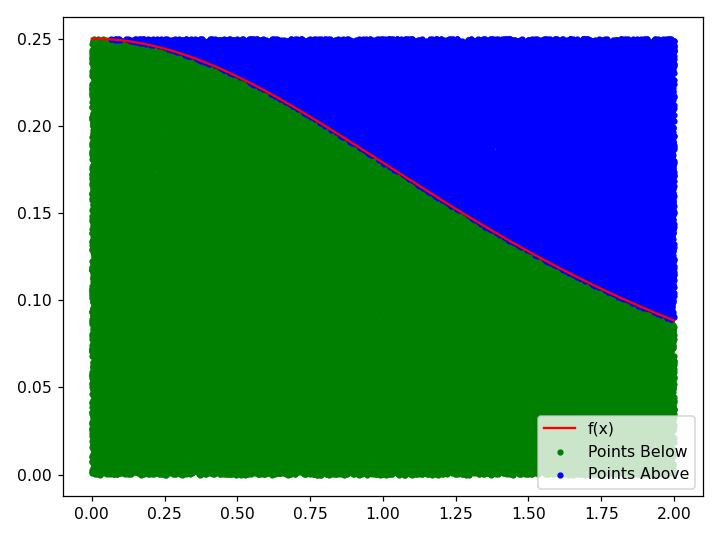

<ipython-input-4-a921ca795079>:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout();


In [4]:
fig = plt.figure('MC Integration')
plt.scatter(x_rand[below], y_rand[below], color = "green", marker = '.',label='Points Below')
plt.scatter(x_rand[above], y_rand[above], color = "blue", marker = '.', label = 'Points Above')
plt.plot(x, y, color = "red", label= 'f(x)')
plt.legend()
plt.tight_layout();


In [5]:
integral_quad = integrate.quad(f,0,2)
percent_error = 100*((integral_quad[0] -integral)/integral)
print("Percent error of monte carlo integration from scipy's quad integration is,", percent_error,"%")

Percent error of monte carlo integration from scipy's quad integration is, 0.35577365690428164 %


# Problem 2a
Read in the data set *./data/decay_data.txt*, this lists the time in days, number of particles, and the uncertianty on the particles. This is the same radio active decay data set used in our fitting example *Fitting_Lecture_Notes* from Module 2b.

Plot the data with its error bars.


<IPython.core.display.Javascript object>


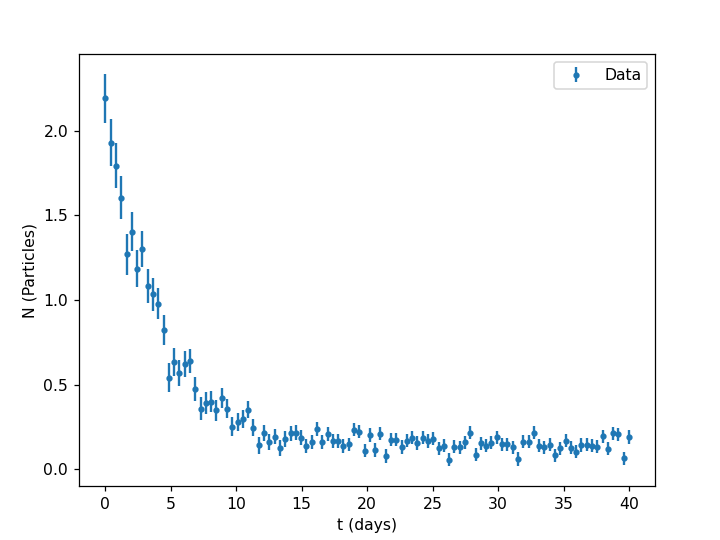

In [6]:
t,N,u = np.loadtxt('C:\\Users\\joelk\\OneDrive\\Documents\\College\\Phys-3511-Fall2021-master\\Phys-3511-Fall2021-master\\Module04\\data\\decay_data.txt',unpack = True)



fig = plt.figure('Days vs N particles')
axes = fig.add_axes([0.11,0.1,0.8,0.8])
axes.set_xlabel('t (days)')
axes.set_ylabel('N (Particles)')

plt.errorbar(t,N,yerr = u, fmt='.', label = 'Data')
plt.legend()
plt.legend()


# Problem 2b

Fit the data with 3 fit parameters using MCMC MH algorithm. You should take 10,000 steps and impliment the random test on $\chi ^2$, like we did our *03_MC_Fit* example notebook using the *get_chi_squared* function. For this we will use a function template of: $y = p_0 \cdot e^{-t/p_1} + p_2$,

where $p_0, p_1$, and $p_2$ are the fit parameters. When fitting you should choose starting values of $p_0 = p_1 = p_2 = 1.0$ to avoid nan errors.

In [7]:
def decay(t,p0,p1,p2):
    return(p0*np.exp(-t/p1)+p2)

In [8]:
one = np.ones(3)
decay_fit, cov2 = curve_fit(decay, t, N, p0=one, sigma=u, absolute_sigma=True)

# Problem 2c

What is the reduced $\chi^2$ of your fit and the p-value?
Is this a good fit?

In [19]:
r = np.linspace(0,40,100)
decay_f = decay(r,*decay_fit)

avg = np.sum(N)/len(N)
ndof = len(N)-len(decay_fit)-1
chi = np.sum((N-decay_f)**2/(u**2))
r_chi = chi/wdof
pval = sf.gammaincc(ndof/2.0, chi/2.0)
print("Reduced chi is", r_chi, "and has a P value of,",pval)

Reduced chi is 1.0513999688029945 and has a P value of, 0.34527132685139805


# Problem 2d

Plot on the same graph your data and the line showin the fitted function.

<IPython.core.display.Javascript object>


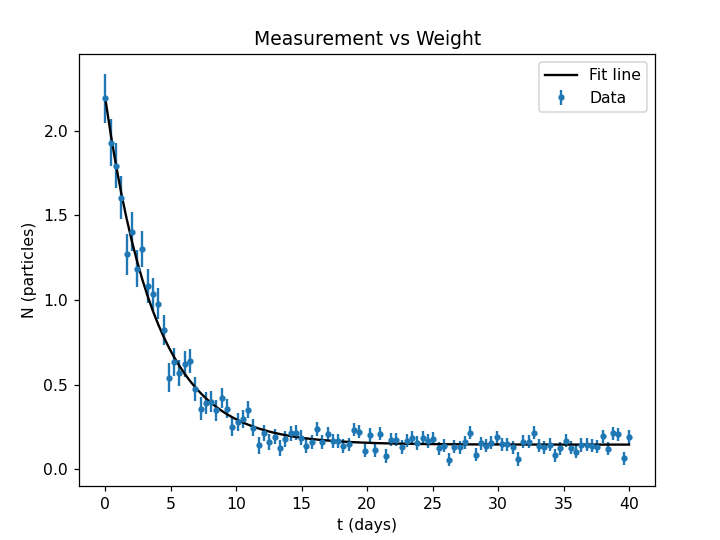

In [10]:
fig = plt.figure()
axes = fig.add_axes([0.11,0.1,0.8,0.8])
axes.set_title('Measurement vs Weight')
axes.set_xlabel('t (days)')
axes.set_ylabel('N (particles)')


axes.errorbar(t,N,yerr = u, fmt='.', label = 'Data')
axes.plot(t,decay(t,*decay_fit),'k-',label='Fit line')
axes.legend()

# Problem 2e

Plot the histogram distributions of the three fit parameters.

<IPython.core.display.Javascript object>


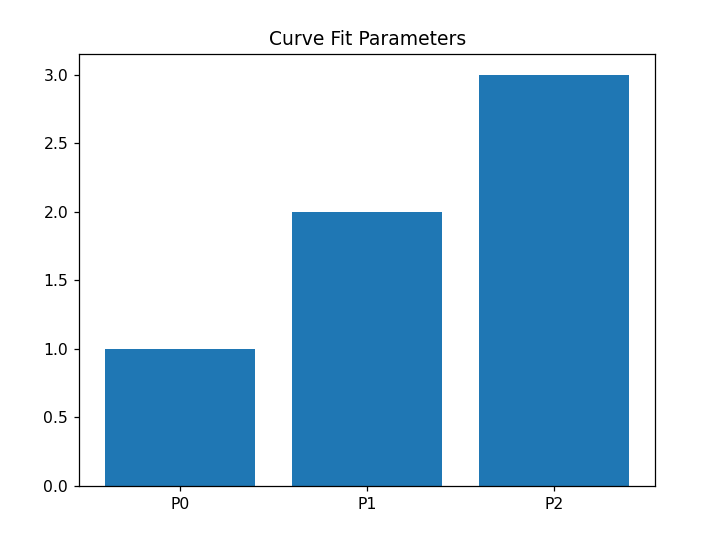

<BarContainer object of 3 artists>

In [11]:
fig = plt.figure()
axes = fig.add_axes([0.11,0.1,0.8,0.8])
axes.set_title('Curve Fit Parameters')

plt.bar(["P0","P1","P2"],[1,2,3])